In [19]:
import numpy as np
import scipy as sp

import scipy
from scipy.stats import multivariate_normal
from scipy       import optimize

import skimage

import matplotlib.pyplot as plt

import pylab

from glob import glob
import sys

import itk

from tqdm import tqdm

import math

import site
site.addsitedir('../../ARGUS')
from ARGUSUtils import *
from ARGUSUtils_IO import *
from ARGUSUtils_Linearization import *

In [20]:
num_mask = 3
im_mask = []
im_mask.append(itk.GetArrayFromImage(itk.imread("EstimatedMask_Depth5_Edited.png", itk.F)))
im_mask.append(itk.GetArrayFromImage(itk.imread("EstimatedMask_Depth12_Edited.png", itk.F)))
im_mask.append(itk.GetArrayFromImage(itk.imread("EstimatedMask_Depth16_Edited.png", itk.F)))
im_mask_depth = [5,12,16]

In [24]:
center = np.zeros((3,2))
for i in range(3):
    im = (im_mask[i]>0).astype(np.uint8)
    center[i] = scipy.ndimage.measurements.center_of_mass(im)
    print(im_mask_depth[i], "has a center at", center[i])
    

5 has a center at [612.81134656 952.6726509 ]
12 has a center at [613.65704065 955.67422727]
16 has a center at [653.62727718 953.61450259]


In [22]:
data_paths = sorted(glob("../../Data/TestingData/BAMC-PTX*Sliding/*.m??"))

In [185]:
im = []
for i in [0,7,14,23,26,28,37,39,40,42,44,52,54,57]:#[0,38]:#[0,20,25,27,29,32,33]:#range(len(data_paths)):
    img = load_video(data_paths[i])
    depth,zoom = get_depth_and_zoom_C52(img[0])
    if(zoom!=1):
        print(i, data_paths[i], depth, zoom)
        itkimg = itk.GetImageFromArray(img.astype(np.float32))
        itkimgBase = itk.GetImageFromArray(img.astype(np.float32))
        itk_spacing = [1/zoom,1/zoom,1]
        itkimg.SetSpacing(itk_spacing)
        depth_index = im_mask_depth.index(depth)
        if(abs(zoom-1.26262627)<0.1):
            itk_origin = [192,108,0]
        elif(abs(zoom-1.012012012)<0.1):
            itk_origin = [0,0,0]
        elif(abs(zoom-0.804804805)):
            itk_origin = [-235,-170,0]
        itkimg.SetOrigin(itk_origin)
        resample = itk.ResampleImage.New(itkimg)
        resample.SetInterpolator("NearestNeighbor")
        resample.SetMatchImage(itkimgBase)
        resample.Update()
        img = itk.GetArrayFromImage(resample.GetOutput())
    im.append(img)

Using non-standard frame rate 10240/512


7 ../../Data/TestingData\BAMC-PTXNoSliding\image_1884162273498_clean.mov 12 1.2627627627627627


Using non-standard frame rate 10240/512


14 ../../Data/TestingData\BAMC-PTXNoSliding\image_2734882394424_CLEAN.mov 12 1.2627627627627627


Using non-standard frame rate 10240/512


23 ../../Data/TestingData\BAMC-PTXNoSliding\image_603665940081_clean.mov 12 1.2627627627627627


Using non-standard frame rate 10240/512


26 ../../Data/TestingData\BAMC-PTXNoSliding\image_614587120545_clean.mov 12 1.2627627627627627


Using non-standard frame rate 10240/512


28 ../../Data/TestingData\BAMC-PTXNoSliding\image_6370410622099_CLEAN.mov 12 1.2627627627627627


Using non-standard frame rate 10240/512


37 ../../Data/TestingData\BAMC-PTXSliding\image_1139765223418_CLEAN.mov 12 1.2627627627627627


Using non-standard frame rate 10240/512


39 ../../Data/TestingData\BAMC-PTXSliding\image_128683942015128_CLEAN.mov 12 1.2627627627627627


Using non-standard frame rate 10240/512


40 ../../Data/TestingData\BAMC-PTXSliding\image_128688523296793_CLEAN.mov 12 1.2627627627627627


Using non-standard frame rate 10240/512


42 ../../Data/TestingData\BAMC-PTXSliding\image_1327616672148_clean.mp4 12 1.2627627627627627


Using non-standard frame rate 10240/512


44 ../../Data/TestingData\BAMC-PTXSliding\image_1511338287338_clean.mov 12 1.2627627627627627


Using non-standard frame rate 10240/512


52 ../../Data/TestingData\BAMC-PTXSliding\image_3321463845606_clean.mp4 12 1.2627627627627627


Using non-standard frame rate 10240/512


54 ../../Data/TestingData\BAMC-PTXSliding\image_3384882513134_clean.mp4 12 1.2627627627627627


Using non-standard frame rate 10240/512


57 ../../Data/TestingData\BAMC-PTXSliding\image_3929217595322_clean.mov 12 1.2627627627627627


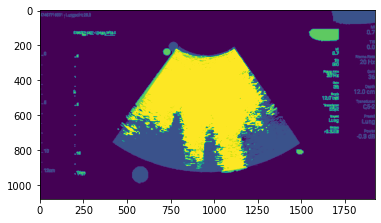

In [202]:
plt.imshow((im[1][0]>1).astype(int)*3+(im[0][0]>1).astype(int))

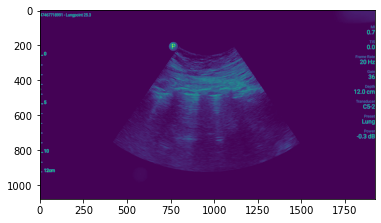

In [101]:
plt.imshow(im[0][0])